# **Разведочный анализ данных. Исследование и визуализация данных.**


## **1) Текстовое описание набора данных**
В качестве набора данных мы будем использовать набор данных c изображениями рукописных цифр. \
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits \

Набор взят из scikit-learn из раздела Toy-datasets. \

Датасет содержит следующие значения: \

data - необходимые для предсказания данные в массиве NumPy \
target - целевые данные в массиве NumPy - номер класса картинки (т.е. к какой цифре от 0 до 9 относится) \
frame - кадр: DataFrame формы (1797, 65) \
feature_names - имена столбцов набора данных \
target_names - имена целевых классов \
images - необработанные данные изображения \
DESCR - описание датасета \

### **Импорт библиотек**
Импортируем библиотеки с помощью команды import. Как правило, все команды import размещают в первой ячейке ноутбука, но мы в этом примере будем подключать все библиотеки последовательно, по мере их использования.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
import sklearn
from sklearn import datasets

### **Загрузка данных** 
Загрузим данные из Scikit-learn и преобразуем их в Pandas Dataframe

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
for x in digits:
    print(x)

data
target
frame
feature_names
target_names
images
DESCR


In [ ]:
data = pd.DataFrame(data= np.c_[digits['data'], digits['target']],
                     columns= digits['feature_names'] + ['target'])

## **2) Основные характеристики датасета**

In [ ]:
data

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,pixel_1_2,pixel_1_3,pixel_1_4,pixel_1_5,pixel_1_6,pixel_1_7,pixel_2_0,pixel_2_1,pixel_2_2,pixel_2_3,pixel_2_4,pixel_2_5,pixel_2_6,pixel_2_7,pixel_3_0,pixel_3_1,pixel_3_2,pixel_3_3,pixel_3_4,pixel_3_5,pixel_3_6,pixel_3_7,pixel_4_0,pixel_4_1,pixel_4_2,pixel_4_3,pixel_4_4,pixel_4_5,pixel_4_6,pixel_4_7,pixel_5_0,pixel_5_1,pixel_5_2,pixel_5_3,pixel_5_4,pixel_5_5,pixel_5_6,pixel_5_7,pixel_6_0,pixel_6_1,pixel_6_2,pixel_6_3,pixel_6_4,pixel_6_5,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,16.0,14.0,12.0,16.0,3.0,0.0,0.0,4.0,16.0,6.0,3.0,16.0,4.0,0.0,0.0,0.0,12.0,16.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,4.0,4.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,5.0,0.0,0.0,0.0,5.0,7.0,7.0,16.0,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,16.0,15.0,12.0,16.0,1.0,0.0,0.0,3.0,16.0,7.0,0.0,13.0,6.0,0.0,0.0,4.0,16.0,0.0,0.0,10.0,8.0,0.0,0.0,8.0,16.0,0.0,0.0,14.0,6.0,0.0,0.0,5.0,16.0,7.0,9.0,16.0,5.0,0.0,0.0,1.0,15.0,16.0,16.0,16.0,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,13.0,16.0,8.0,2.0,1.0,0.0,0.0,0.0,16.0,15.0,10.0,16.0,5.0,0.0,0.0,0.0,8.0,16.0,16.0,7.0,0.0,0.0,0.0,0.0,9.0,16.0,16.0,4.0,0.0,0.0,0.0,0.0,16.0,14.0,16.0,15.0,0.0,0.0,0.0,0.0,15.0,15.0,15.0,16.0,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,14.0,16.0,16.0,15.0,1.0,0.0,0.0,4.0,16.0,7.0,3.0,16.0,7.0,0.0,0.0,5.0,16.0,10.0,7.0,16.0,4.0,0.0,0.0,0.0,5.0,14.0,14.0,16.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,2.0,0.0,0.0,0.0,4.0,7.0,7.0,16.0,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9.0


In [ ]:
# Первые 5 строк датасета - первые 5 картинок в пикселях
data.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,pixel_1_2,pixel_1_3,pixel_1_4,pixel_1_5,pixel_1_6,pixel_1_7,pixel_2_0,pixel_2_1,pixel_2_2,pixel_2_3,pixel_2_4,pixel_2_5,pixel_2_6,pixel_2_7,pixel_3_0,pixel_3_1,pixel_3_2,pixel_3_3,pixel_3_4,pixel_3_5,pixel_3_6,pixel_3_7,pixel_4_0,pixel_4_1,pixel_4_2,pixel_4_3,pixel_4_4,pixel_4_5,pixel_4_6,pixel_4_7,pixel_5_0,pixel_5_1,pixel_5_2,pixel_5_3,pixel_5_4,pixel_5_5,pixel_5_6,pixel_5_7,pixel_6_0,pixel_6_1,pixel_6_2,pixel_6_3,pixel_6_4,pixel_6_5,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0


In [ ]:
# Размер датасета - 1797 строк, 65 колонок (картинка 8х8 и target)
data.shape

(1797, 65)

In [ ]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 1797


In [ ]:
# Список колонок
data.columns

Index(['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4',
       'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1',
       'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6',
       'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3',
       'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0',
       'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5',
       'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2',
       'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7',
       'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4',
       'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1',
       'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6',
       'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3',
       'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7', 'target'],
      dtype='object')

In [ ]:
# Список колонок с типами данных
data.dtypes

pixel_0_0    float64
pixel_0_1    float64
pixel_0_2    float64
pixel_0_3    float64
pixel_0_4    float64
              ...   
pixel_7_4    float64
pixel_7_5    float64
pixel_7_6    float64
pixel_7_7    float64
target       float64
Length: 65, dtype: object

In [ ]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

### data.decribe()
DataFrame.count - количество не null наблюдений \
DataFrame.max - максимум значений в объекте \
DataFrame.мин - минимум значений в объекте \
DataFrame.mean - среднее значение \
DataFrame.std - стандартное отклонение наблюдений \
DataFrame.select_dtypes - подмножество DataFrame, включая/исключая столбцы на основе их dtype, в перцентилях

**Перцентиль** - это показатель, используемый в статистике, показывающий значение, ниже которого падает определенный процент наблюдений в группе наблюдений

*Пояснение:*

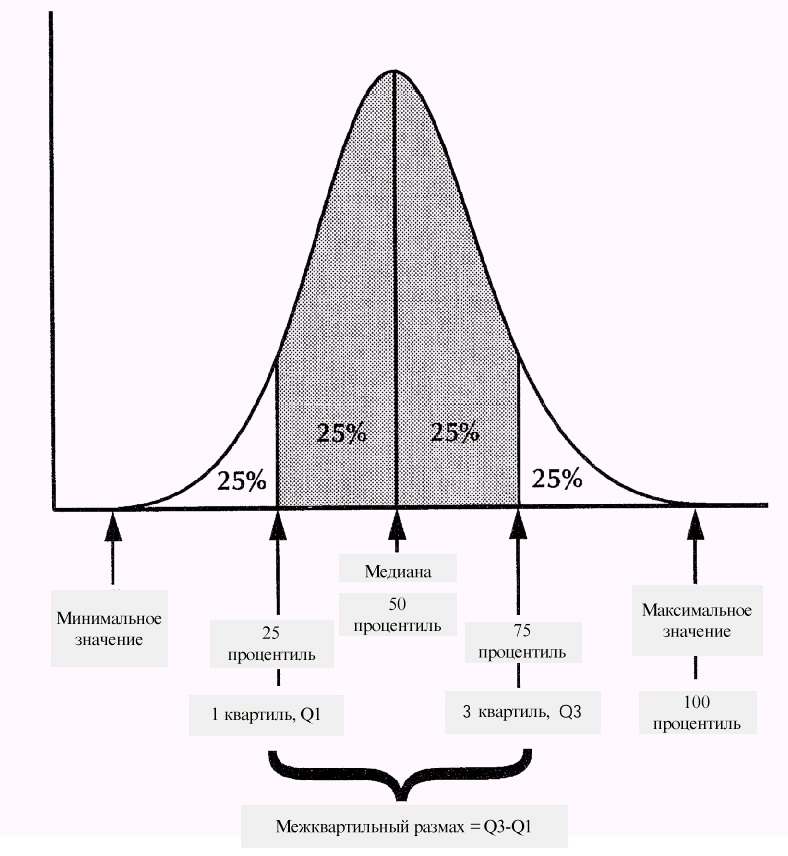

In [ ]:
# Основные статистические характеристки набора данных
data.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,pixel_1_2,pixel_1_3,pixel_1_4,pixel_1_5,pixel_1_6,pixel_1_7,pixel_2_0,pixel_2_1,pixel_2_2,pixel_2_3,pixel_2_4,pixel_2_5,pixel_2_6,pixel_2_7,pixel_3_0,pixel_3_1,pixel_3_2,pixel_3_3,pixel_3_4,pixel_3_5,pixel_3_6,pixel_3_7,pixel_4_0,pixel_4_1,pixel_4_2,pixel_4_3,pixel_4_4,pixel_4_5,pixel_4_6,pixel_4_7,pixel_5_0,pixel_5_1,pixel_5_2,pixel_5_3,pixel_5_4,pixel_5_5,pixel_5_6,pixel_5_7,pixel_6_0,pixel_6_1,pixel_6_2,pixel_6_3,pixel_6_4,pixel_6_5,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,10.382304,11.979410,10.279354,8.175849,1.846411,0.107958,0.002782,2.601558,9.903172,6.992766,7.097941,7.806344,1.788536,0.050083,0.001113,2.469672,9.091263,8.821369,9.927101,7.551475,2.317752,0.002226,0.0,2.339455,7.667223,9.071786,10.301614,8.744018,2.909293,0.0,0.008904,1.583751,6.881469,7.228158,7.672231,8.236505,3.456316,0.027268,0.007234,0.704508,7.506956,9.539232,9.416249,8.758486,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,5.421456,3.977543,4.782681,6.052960,3.586321,0.827915,0.062368,3.576301,5.690767,5.802662,6.175729,6.197322,3.259870,0.438597,0.033352,3.146532,6.192038,5.882936,6.152093,5.872556,3.686456,0.047140,0.0,3.480372,6.324687,6.268391,5.933490,5.870648,3.537283,0.0,0.145185,2.981816,6.537955,6.441378,6.259511,5.695527,4.330951,0.307356,0.204223,1.746153,5.644496,5.226948,5.302048,6.031154,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,9.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,4.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,3.000000,6.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,12.000000,13.000000,11.000000,9.000000,0.000000,0.000000,0.000000,1.000000,12.000000,6.000000,6.000000,8.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,12.000000,7.0

In [ ]:
# Определим уникальные значения для целевого признака
data['target'].unique()

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

Целевой признак содержит все уникальные классы картинок - цифры от 0 до 9

Выведем первые 5 картинок датасета

<Figure size 432x288 with 0 Axes>

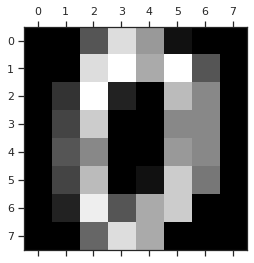

<Figure size 432x288 with 0 Axes>

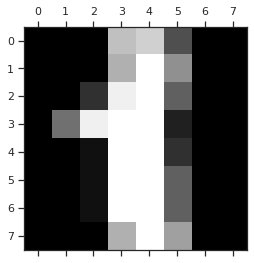

<Figure size 432x288 with 0 Axes>

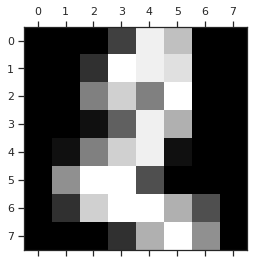

<Figure size 432x288 with 0 Axes>

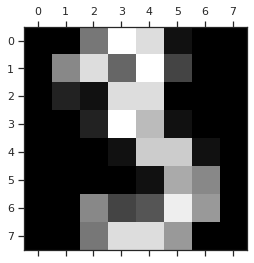

<Figure size 432x288 with 0 Axes>

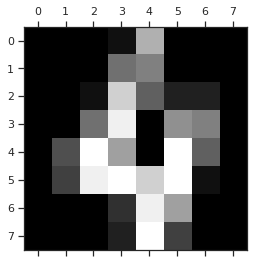

In [ ]:
for i in range(5):
  plt.gray()
  plt.matshow(digits.images[i])
  plt.show()

## **3) Визуальное исследование датасета**
Для визуального исследования могут быть использованы различные виды диаграмм, мы построим только некоторые варианты диаграмм, которые используются достаточно часто.



### **Imshow**

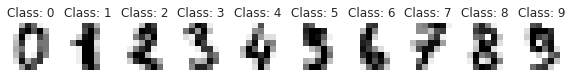

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Class: %i" % label)

### **Гистограмма**
Позволяет оценить плотность вероятности распределения данных.
Посторим диаграмму для какого-либо пикселя из нашего датасета и посмотрим, какие значения он чаще всего принимает.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


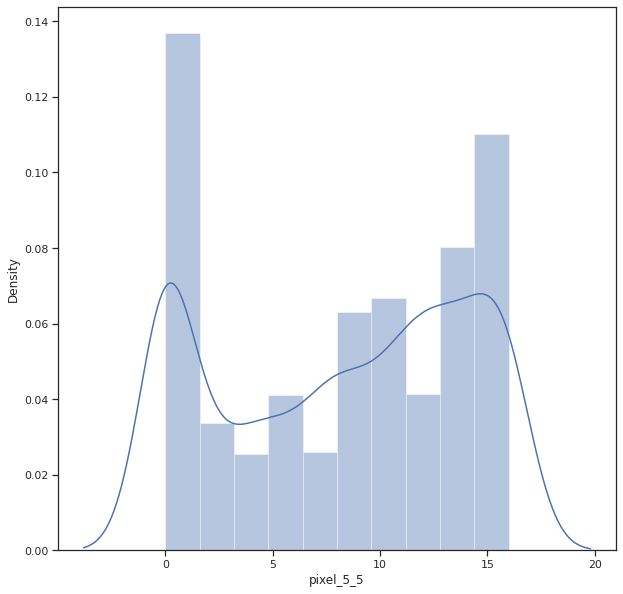

In [ ]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['pixel_5_5'])

### **Ящик с усами**
Отображает одномерное распределение вероятности.

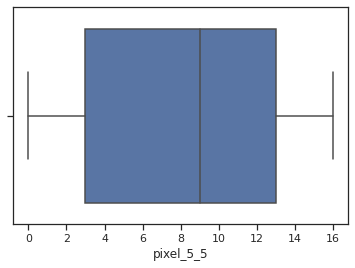

In [ ]:
sns.boxplot(x=data['pixel_5_5'])

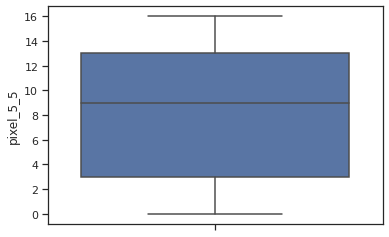

In [ ]:
# По вертикали
sns.boxplot(y=data['pixel_5_5'])

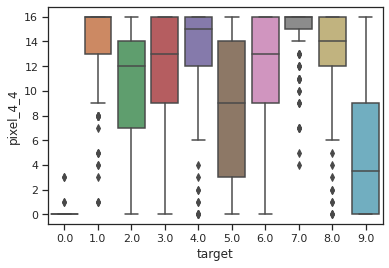

In [ ]:
# Распределение параметра сгруппированное по target.
sns.boxplot(x='target', y='pixel_4_4', data=data)

Взяли пиксель 4_4 посередине и, как видим в цифре 0 он практически не встречается

### **Violin plot**
Похоже на предыдущую диаграмму, но по краям отображаются распределения плотности

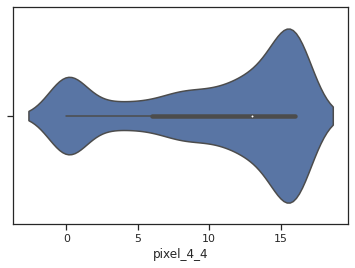

In [ ]:
sns.violinplot(x=data['pixel_4_4'])

### **Subplots**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


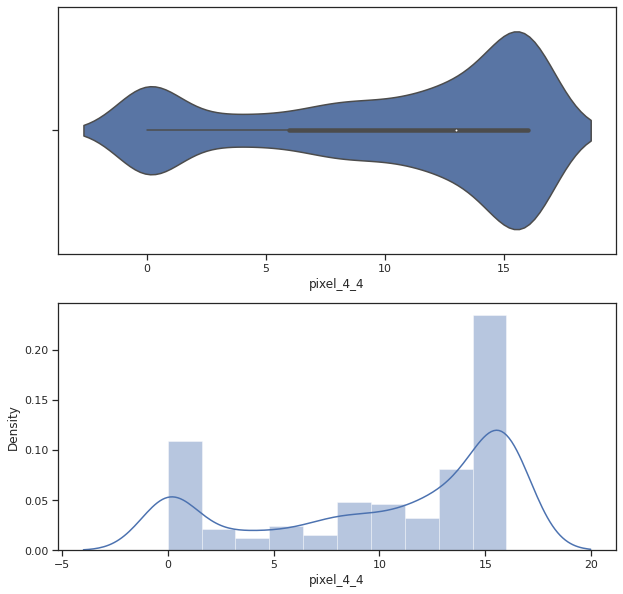

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['pixel_4_4'])
sns.distplot(data['pixel_4_4'], ax=ax[1])

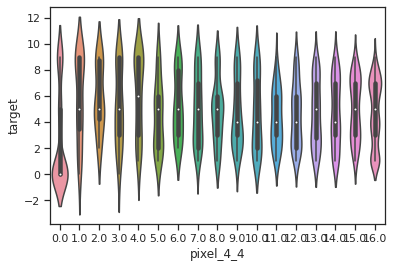

In [ ]:
# Распределение параметра сгруппированное по target.
sns.violinplot(x='pixel_4_4', y='target', data=data)

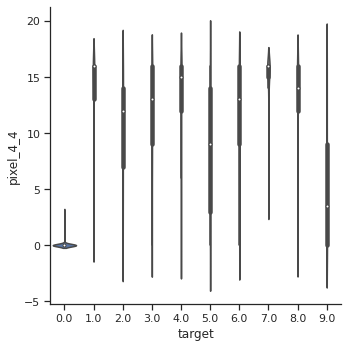

In [ ]:
sns.catplot(y='pixel_4_4', x='target', data=data, kind="violin", split=True)

## **4) Информация о корреляции признаков**
Проверка корреляции признаков позволяет решить две задачи:

Понять какие признаки (колонки датасета) наиболее сильно коррелируют с целевым признаком (в нашем примере это колонка "target"). Именно эти признаки будут наиболее информативными для моделей машинного обучения. Признаки, которые слабо коррелируют с целевым признаком, можно попробовать исключить из построения модели, иногда это повышает качество модели. Нужно отметить, что некоторые алгоритмы машинного обучения автоматически определяют ценность того или иного признака для построения модели. \
Понять какие нецелевые признаки линейно зависимы между собой. Линейно зависимые признаки, как правило, очень плохо влияют на качество моделей. Поэтому если несколько признаков линейно зависимы, то для построения модели из них выбирают какой-то один признак.


In [ ]:
data.corr()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,pixel_1_2,pixel_1_3,pixel_1_4,pixel_1_5,pixel_1_6,pixel_1_7,pixel_2_0,pixel_2_1,pixel_2_2,pixel_2_3,pixel_2_4,pixel_2_5,pixel_2_6,pixel_2_7,pixel_3_0,pixel_3_1,pixel_3_2,pixel_3_3,pixel_3_4,pixel_3_5,pixel_3_6,pixel_3_7,pixel_4_0,pixel_4_1,pixel_4_2,pixel_4_3,pixel_4_4,pixel_4_5,pixel_4_6,pixel_4_7,pixel_5_0,pixel_5_1,pixel_5_2,pixel_5_3,pixel_5_4,pixel_5_5,pixel_5_6,pixel_5_7,pixel_6_0,pixel_6_1,pixel_6_2,pixel_6_3,pixel_6_4,pixel_6_5,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
pixel_0_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel_0_1,NaN,1.000000,0.556618,0.207814,-0.018761,0.060776,0.048388,-0.038927,0.032320,0.556372,0.224522,-0.109056,0.027908,-0.063983,-0.029973,-0.043697,-0.005109,0.213586,-0.113581,-0.105882,0.096254,-0.170070,-0.131330,-0.038266,-0.011183,-0.085911,-0.146383,0.072981,0.041083,-0.206318,-0.150754,-0.015824,NaN,-0.168296,-0.178488,0.044139,-0.059858,-0.235776,-0.173245,NaN,-0.020551,-0.124267,-0.142999,0.024242,-0.054716,-0.163272,-0.086466,-0.025736,-0.011871,0.225775,0.115281,0.020382,0.031455,-0.009579,0.030953,-0.045342,-0.007905,0.855610,0.555727,0.147646,-0.102349,-0.029870,0.026547,-0.043889,-0.051834
pixel_0_2,NaN,0.556618,1.000000,0.560180,-0.084235,0.043569,0.002841,-0.062278,0.022311,0.582259,0.631467,-0.286026,0.028798,0.063248,-0.089221,-0.100526,-0.016943,0.278864,-0.084251,-0.310726,0.208726,-0.086630,-0.217657,-0.118925,-0.036549,-0.153100,-0.310519,0.108378,0.199761,-0.193759,-0.192081,-0.051716,NaN,-0.344061,-0.396431,-0.055715,-0.120387,-0.279790,-0.183321,NaN,-0.067167,-0.268728,-0.341944,-0.157470,-0.203247,-0.189976,-0.069215,-0.064782,-0.038797,0.205796,0.262176,-0.042531,-0.051530,0.082865,0.050849,-0.003804,-0.025837,0.515276,0.937623,0.499840,-0.134754,-0.041183,0.072599,0.082523,-0.011836
pixel_0_3,NaN,0.207814,0.560180,1.000000,0.023938,-0.171377,-0.115732,-0.040139,0.035663,0.328344,0.596480,-0.002440,-0.068626,0.023163,-0.178804,-0.113830,0.022736,0.187811,0.040516,-0.360440,0.067943,-0.018315,-0.224892,-0.149758,-0.002639,-0.109260,-0.256293,-0.057108,0.090178,-0.183257,-0.141774,-0.067672,NaN,-0.227455,-0.224377,0.017606,-0.077963,-0.226493,-0.037223,NaN,-0.099624,-0.257836,-0.102203,-0.025302,-0.243829,-0.214744,0.089703,0.046919,-0.062799,0.015447,0.299762,0.279420,-0.180531,0.022396,0.139397,0.075335,-0.049085,0.175804,0.560326,0.767945,-0.065957,-0.054936,0.053437,0.081971,-0.011489
pixel_0_4,NaN,-0.018761,-0.084235,0.023938,1.000000,0.507731,0.127764,0.010065,0.042065,0.051657,0.013998,-0.135715,0.160268,0.390035,0.133625,0.014505,0.009911,0.036612,-0.124452,-0.155501,-0.029025,0.182671,0.078333,0.023887,0.008971,0.027043,-0.063194,0.036231,0.089654,0.122548,0.078057,0.012694,NaN,-0.028073,-0.015664,0.026593,0.069915,0.089086,0.051408,NaN,0.023642,-0.018364,-0.095154,-0.037575,0.051713,0.074574,-0.090120,-0.039530,0.024149,-0.020577,-0.165601,-0.043649,0.030314,-0.120561,-0.264968,-0.212220,0.017352,-0.047223,-0.020176,-0.008867,-0.082125,-0.215809,-0.250699,-0.215349,0.100801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel_7_4,NaN,-0.102349,-0.134754,-0.065957,-0.082125,-0.351146,-0.383522,-0.178243,0.048996,-0.000604,-0.077451,0.046670,0.015946,-0.199519,-0.298199,-0.100317,0.021630,0.036393,0.119076,0.207694,0.002642,-0.120517,-0.079916,-0.002784,0.008059,0.029233,0.083202,0.066731,-0.108922,-0.163125,-0.144672,0.001828,NaN,0.020895,-0.071784,-0.183403,-0.181357,0.018

Корреляционная матрица содержит коэффициенты корреляции между всеми парами признаков. \

Корреляционная матрица симметрична относительно главной диагонали. На главной диагонали расположены единицы (корреляция признака самого с собой). \

На основе корреляционной матрицы можно сделать следующие выводы: \

Целевой признак как-то коррелирует с пикселями 1_6, 3_3, 3_4, 3_5, 4_3. Эти пиксели обязательно следует оставить в модели.
Целевой признак отчасти коррелирует с пикселями 0_4, 0_5, 0_6, 0_7, 1_2, 1_3, 1_4, 2_3, 2_4, 2_5, 3_1, 4_1, 4_4, 4_5, 5_1, 5_2, 6_3, 6_4
Особо сильно коррелирующих между собой пикселей нет, и для точности изображения лучше оставить слабо кррелирующие.

Описание метода corr - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

По умолчанию при построении матрицы используется коэффициент корреляции Пирсона. Возможно также построить корреляционную матрицу на основе коэффициентов корреляции Кендалла и Спирмена. На практике три метода редко дают значимые различия.

In [ ]:
data.corr(method='pearson')

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,pixel_1_2,pixel_1_3,pixel_1_4,pixel_1_5,pixel_1_6,pixel_1_7,pixel_2_0,pixel_2_1,pixel_2_2,pixel_2_3,pixel_2_4,pixel_2_5,pixel_2_6,pixel_2_7,pixel_3_0,pixel_3_1,pixel_3_2,pixel_3_3,pixel_3_4,pixel_3_5,pixel_3_6,pixel_3_7,pixel_4_0,pixel_4_1,pixel_4_2,pixel_4_3,pixel_4_4,pixel_4_5,pixel_4_6,pixel_4_7,pixel_5_0,pixel_5_1,pixel_5_2,pixel_5_3,pixel_5_4,pixel_5_5,pixel_5_6,pixel_5_7,pixel_6_0,pixel_6_1,pixel_6_2,pixel_6_3,pixel_6_4,pixel_6_5,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
pixel_0_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel_0_1,NaN,1.000000,0.556618,0.207814,-0.018761,0.060776,0.048388,-0.038927,0.032320,0.556372,0.224522,-0.109056,0.027908,-0.063983,-0.029973,-0.043697,-0.005109,0.213586,-0.113581,-0.105882,0.096254,-0.170070,-0.131330,-0.038266,-0.011183,-0.085911,-0.146383,0.072981,0.041083,-0.206318,-0.150754,-0.015824,NaN,-0.168296,-0.178488,0.044139,-0.059858,-0.235776,-0.173245,NaN,-0.020551,-0.124267,-0.142999,0.024242,-0.054716,-0.163272,-0.086466,-0.025736,-0.011871,0.225775,0.115281,0.020382,0.031455,-0.009579,0.030953,-0.045342,-0.007905,0.855610,0.555727,0.147646,-0.102349,-0.029870,0.026547,-0.043889,-0.051834
pixel_0_2,NaN,0.556618,1.000000,0.560180,-0.084235,0.043569,0.002841,-0.062278,0.022311,0.582259,0.631467,-0.286026,0.028798,0.063248,-0.089221,-0.100526,-0.016943,0.278864,-0.084251,-0.310726,0.208726,-0.086630,-0.217657,-0.118925,-0.036549,-0.153100,-0.310519,0.108378,0.199761,-0.193759,-0.192081,-0.051716,NaN,-0.344061,-0.396431,-0.055715,-0.120387,-0.279790,-0.183321,NaN,-0.067167,-0.268728,-0.341944,-0.157470,-0.203247,-0.189976,-0.069215,-0.064782,-0.038797,0.205796,0.262176,-0.042531,-0.051530,0.082865,0.050849,-0.003804,-0.025837,0.515276,0.937623,0.499840,-0.134754,-0.041183,0.072599,0.082523,-0.011836
pixel_0_3,NaN,0.207814,0.560180,1.000000,0.023938,-0.171377,-0.115732,-0.040139,0.035663,0.328344,0.596480,-0.002440,-0.068626,0.023163,-0.178804,-0.113830,0.022736,0.187811,0.040516,-0.360440,0.067943,-0.018315,-0.224892,-0.149758,-0.002639,-0.109260,-0.256293,-0.057108,0.090178,-0.183257,-0.141774,-0.067672,NaN,-0.227455,-0.224377,0.017606,-0.077963,-0.226493,-0.037223,NaN,-0.099624,-0.257836,-0.102203,-0.025302,-0.243829,-0.214744,0.089703,0.046919,-0.062799,0.015447,0.299762,0.279420,-0.180531,0.022396,0.139397,0.075335,-0.049085,0.175804,0.560326,0.767945,-0.065957,-0.054936,0.053437,0.081971,-0.011489
pixel_0_4,NaN,-0.018761,-0.084235,0.023938,1.000000,0.507731,0.127764,0.010065,0.042065,0.051657,0.013998,-0.135715,0.160268,0.390035,0.133625,0.014505,0.009911,0.036612,-0.124452,-0.155501,-0.029025,0.182671,0.078333,0.023887,0.008971,0.027043,-0.063194,0.036231,0.089654,0.122548,0.078057,0.012694,NaN,-0.028073,-0.015664,0.026593,0.069915,0.089086,0.051408,NaN,0.023642,-0.018364,-0.095154,-0.037575,0.051713,0.074574,-0.090120,-0.039530,0.024149,-0.020577,-0.165601,-0.043649,0.030314,-0.120561,-0.264968,-0.212220,0.017352,-0.047223,-0.020176,-0.008867,-0.082125,-0.215809,-0.250699,-0.215349,0.100801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel_7_4,NaN,-0.102349,-0.134754,-0.065957,-0.082125,-0.351146,-0.383522,-0.178243,0.048996,-0.000604,-0.077451,0.046670,0.015946,-0.199519,-0.298199,-0.100317,0.021630,0.036393,0.119076,0.207694,0.002642,-0.120517,-0.079916,-0.002784,0.008059,0.029233,0.083202,0.066731,-0.108922,-0.163125,-0.144672,0.001828,NaN,0.020895,-0.071784,-0.183403,-0.181357,0.018

In [ ]:
data.corr(method='kendall')

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,pixel_1_2,pixel_1_3,pixel_1_4,pixel_1_5,pixel_1_6,pixel_1_7,pixel_2_0,pixel_2_1,pixel_2_2,pixel_2_3,pixel_2_4,pixel_2_5,pixel_2_6,pixel_2_7,pixel_3_0,pixel_3_1,pixel_3_2,pixel_3_3,pixel_3_4,pixel_3_5,pixel_3_6,pixel_3_7,pixel_4_0,pixel_4_1,pixel_4_2,pixel_4_3,pixel_4_4,pixel_4_5,pixel_4_6,pixel_4_7,pixel_5_0,pixel_5_1,pixel_5_2,pixel_5_3,pixel_5_4,pixel_5_5,pixel_5_6,pixel_5_7,pixel_6_0,pixel_6_1,pixel_6_2,pixel_6_3,pixel_6_4,pixel_6_5,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
pixel_0_0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel_0_1,NaN,1.000000,0.465882,0.256522,0.038614,0.029441,0.062169,-0.048597,0.067609,0.515746,0.221959,-0.174222,0.026321,-0.036322,0.001073,-0.067415,0.010677,0.187214,-0.127969,-0.120624,0.123267,-0.128664,-0.146100,-0.055192,-0.013519,-0.107733,-0.148666,0.070742,0.081118,-0.171222,-0.183863,-0.019129,NaN,-0.205192,-0.196703,0.007107,-0.070971,-0.177087,-0.170765,NaN,-0.028711,-0.174212,-0.168184,-0.032336,-0.076764,-0.113548,-0.065480,-0.030818,-0.019122,0.241318,0.105905,-0.023002,0.007976,0.037714,0.064309,-0.017027,-0.009556,0.677321,0.471248,0.221563,-0.033074,-0.003165,0.056966,0.000990,-0.040492
pixel_0_2,NaN,0.465882,1.000000,0.506751,0.011530,0.037044,0.026456,-0.053528,0.026521,0.505813,0.545036,-0.226893,0.006904,0.076537,0.001355,-0.085306,-0.006420,0.235358,-0.029183,-0.265902,0.141521,-0.028314,-0.132793,-0.129960,-0.037825,-0.140361,-0.237878,0.053015,0.132523,-0.130304,-0.145399,-0.053522,NaN,-0.292780,-0.310302,-0.054672,-0.120098,-0.208919,-0.139595,NaN,-0.080333,-0.238069,-0.262261,-0.152249,-0.180605,-0.136718,-0.050523,-0.073336,-0.053503,0.214762,0.223257,-0.022733,-0.073193,0.062404,0.078101,0.029622,-0.026739,0.432331,0.835192,0.486278,-0.066101,-0.034704,0.025642,0.091449,0.008607
pixel_0_3,NaN,0.256522,0.506751,1.000000,0.079054,-0.087038,-0.095483,-0.059491,0.029306,0.294348,0.341575,-0.091481,0.027955,0.019057,-0.105278,-0.098963,0.019186,0.125125,-0.015917,-0.207941,0.115702,0.001633,-0.126720,-0.109623,-0.009125,-0.144849,-0.207858,-0.023621,0.091840,-0.110420,-0.091353,-0.052453,NaN,-0.189977,-0.176181,0.018932,-0.045937,-0.149532,-0.044145,NaN,-0.079375,-0.157554,-0.090488,-0.014778,-0.134479,-0.138576,0.009612,0.023339,-0.054156,0.078126,0.194745,0.146840,-0.086977,0.036559,0.096510,0.065269,-0.030482,0.207891,0.507393,0.468383,0.008530,-0.024476,0.035779,0.101062,-0.042824
pixel_0_4,NaN,0.038614,0.011530,0.079054,1.000000,0.496506,0.181453,-0.000730,0.044320,0.097564,0.059772,-0.115537,-0.002117,0.275397,0.163235,-0.023110,0.012257,0.028036,-0.078504,-0.140710,-0.024280,0.093468,0.042623,-0.007876,0.007550,-0.018158,-0.057540,0.019561,0.066454,0.049597,0.023112,0.014803,NaN,-0.033146,-0.021288,0.056868,0.096476,0.044999,0.018022,NaN,0.014187,-0.065753,-0.098701,-0.011242,0.062124,0.033743,-0.081108,-0.049500,0.017556,-0.056778,-0.126749,-0.015114,0.018879,-0.087604,-0.181114,-0.155221,0.014554,-0.012783,0.038562,0.053911,-0.046014,-0.161454,-0.183123,-0.155410,0.080654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel_7_4,NaN,-0.033074,-0.066101,0.008530,-0.046014,-0.207973,-0.300862,-0.159818,0.060314,0.020910,-0.025894,0.015844,-0.010058,-0.145728,-0.252171,-0.118009,0.020971,0.049278,0.033547,0.103400,0.004693,-0.091798,-0.097199,-0.051865,-0.005584,-0.000378,0.015294,0.052080,-0.051186,-0.122137,-0.112936,0.004351,NaN,-0.017748,-0.057469,-0.096137,-0.113494,0.009346,0.

In [ ]:
data.corr(method='spearman')

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,pixel_1_2,pixel_1_3,pixel_1_4,pixel_1_5,pixel_1_6,pixel_1_7,pixel_2_0,pixel_2_1,pixel_2_2,pixel_2_3,pixel_2_4,pixel_2_5,pixel_2_6,pixel_2_7,pixel_3_0,pixel_3_1,pixel_3_2,pixel_3_3,pixel_3_4,pixel_3_5,pixel_3_6,pixel_3_7,pixel_4_0,pixel_4_1,pixel_4_2,pixel_4_3,pixel_4_4,pixel_4_5,pixel_4_6,pixel_4_7,pixel_5_0,pixel_5_1,pixel_5_2,pixel_5_3,pixel_5_4,pixel_5_5,pixel_5_6,pixel_5_7,pixel_6_0,pixel_6_1,pixel_6_2,pixel_6_3,pixel_6_4,pixel_6_5,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
pixel_0_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel_0_1,NaN,1.000000,0.546549,0.306121,0.045618,0.034906,0.067141,-0.050107,0.069335,0.574771,0.266430,-0.209818,0.031789,-0.043110,0.001021,-0.069521,0.010952,0.214454,-0.152986,-0.145819,0.145842,-0.152814,-0.161939,-0.056797,-0.013862,-0.123260,-0.177135,0.085209,0.096136,-0.205894,-0.205611,-0.019615,NaN,-0.230888,-0.234852,0.008025,-0.083687,-0.213121,-0.195719,NaN,-0.029463,-0.193135,-0.197639,-0.037937,-0.091679,-0.137431,-0.076016,-0.031666,-0.019615,0.259786,0.127695,-0.027658,0.009607,0.045135,0.074010,-0.017636,-0.009799,0.695570,0.554887,0.262853,-0.038959,-0.003872,0.062895,0.001071,-0.048067
pixel_0_2,NaN,0.546549,1.000000,0.643599,0.014205,0.049032,0.032624,-0.063069,0.031093,0.628635,0.702562,-0.304321,0.009832,0.112964,0.002308,-0.100548,-0.007524,0.301471,-0.043204,-0.367840,0.187094,-0.034875,-0.163688,-0.152699,-0.044341,-0.185215,-0.318219,0.076755,0.183280,-0.175727,-0.183822,-0.062742,NaN,-0.375139,-0.418246,-0.077684,-0.168802,-0.281665,-0.183295,NaN,-0.094244,-0.300152,-0.346472,-0.203461,-0.247569,-0.187079,-0.068293,-0.086184,-0.062742,0.261408,0.304749,-0.026895,-0.099590,0.088719,0.101611,0.035197,-0.031345,0.509189,0.943023,0.616808,-0.090226,-0.047479,0.033075,0.109046,0.003901
pixel_0_3,NaN,0.306121,0.643599,1.000000,0.109956,-0.118404,-0.116923,-0.069967,0.034186,0.369092,0.445723,-0.127617,0.041537,0.027389,-0.132354,-0.115930,0.022381,0.160653,-0.031068,-0.284359,0.155425,0.002425,-0.157991,-0.128142,-0.010637,-0.190896,-0.279223,-0.032021,0.124281,-0.150419,-0.116194,-0.061149,NaN,-0.242872,-0.236978,0.024790,-0.063817,-0.200963,-0.057500,NaN,-0.092659,-0.196327,-0.119605,-0.019180,-0.186583,-0.186208,0.011688,0.027239,-0.063129,0.094400,0.264300,0.198327,-0.122859,0.048666,0.127995,0.077149,-0.035535,0.247587,0.646538,0.570535,0.010499,-0.032816,0.045415,0.119529,-0.067370
pixel_0_4,NaN,0.045618,0.014205,0.109956,1.000000,0.630281,0.221711,-0.000879,0.051690,0.122804,0.083223,-0.160046,0.002922,0.365589,0.205149,-0.027293,0.014291,0.036423,-0.106854,-0.196491,-0.032684,0.125819,0.053291,-0.009371,0.008797,-0.023673,-0.078451,0.028149,0.090659,0.068274,0.028213,0.017248,NaN,-0.042197,-0.028806,0.079064,0.131326,0.060542,0.023357,NaN,0.016546,-0.083220,-0.130167,-0.015524,0.084577,0.043075,-0.103910,-0.057827,0.020433,-0.069819,-0.173136,-0.022797,0.025773,-0.118538,-0.235214,-0.183476,0.016959,-0.014930,0.053984,0.075355,-0.068580,-0.217234,-0.229098,-0.183080,0.115201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel_7_4,NaN,-0.038959,-0.090226,0.010499,-0.068580,-0.280185,-0.364332,-0.185451,0.069643,0.026076,-0.034368,0.018777,-0.012344,-0.196464,-0.313098,-0.137167,0.024218,0.062576,0.047590,0.137944,0.006972,-0.123538,-0.120388,-0.060249,-0.006445,-0.000562,0.022866,0.072344,-0.068342,-0.164681,-0.142788,0.005023,NaN,-0.023270,-0.078142,-0.129141,-0.152891,0.011972,0.0

В случае большого количества признаков анализ числовой корреляционной матрицы становится неудобен.

Для визуализации корреляционной матрицы будем использовать "тепловую карту" heatmap которая показывает степень корреляции различными цветами.

Используем метод heatmap библиотеки seaborn - https://seaborn.pydata.org/generated/seaborn.heatmap.html

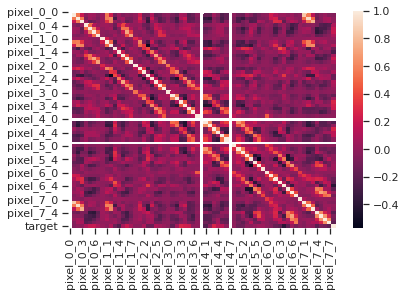

In [ ]:
sns.heatmap(data.corr())

In [ ]:
data2 = data
data2.drop(data2.columns[[1,2,3,4,5,11,12,13,14,15,16,17]], axis = 1)
print(data2)
# Вывод значений в ячейках
sns.heatmap(data2.corr(), annot=True, fmt='.3f')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


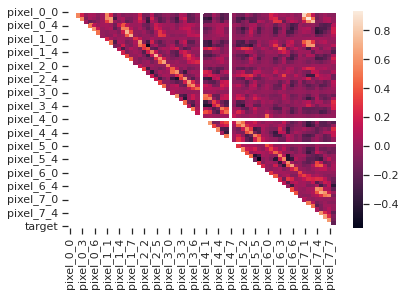

In [ ]:
# Треугольный вариант матрицы
mask = np.zeros_like(data.corr(), dtype=np.bool)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(), mask=mask, fmt='.3f')

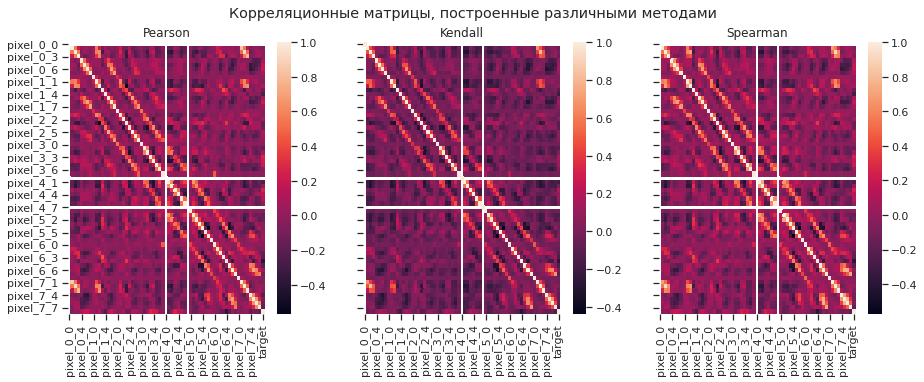

In [ ]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')

Необходимо отметить, что тепловая карта не очень хорошо подходит для определения корреляции нецелевых признаков между собой.

Но в реальной модели могут быть сотни признаков и коррелирующие признаки могут образовывать группы, состояшие более чем из двух признаков. Увидеть такие группы с помощью тепловой карты сложно.